# Affinity through time

PROTOTYPE

In [1]:
import ete3
from historydag import beast_loader
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
output_dir = 'output/'

In [4]:
xml_file = "replay-beast-trees/skyline/skyline_PR1.1-1-LB-20-GC.xml"
nexus_file = "replay-beast-trees/skyline/PR1.1-1-LB-20-GC_with_time.history.trees"
naive_sequence = "GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA"

In [5]:
# NOTE: we skip the first beast tree because we like hairy caterpillars
trees = list(beast_loader.load_beast_trees(xml_file, nexus_file, reference_sequence=naive_sequence)[0])[1:]

## DMS data

Table of mutation effects

In [6]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


Position map

In [7]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [8]:
igh_pos_map = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
igk_pos_map = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

igh_frame = 1
igk_frame = 1
igk_idx = 336

def aa(seq, frame):
    return Seq(seq[(frame - 1) : (frame - 1 + (3 * ((len(seq) - (frame - 1)) // 3)))]).translate()

naive_igh_aa = aa(naive_sequence[:igk_idx], igh_frame)
naive_igk_aa = aa(naive_sequence[igk_idx:], igk_frame)

In [9]:
def mutations(naive_aa, aa, pos_map, chain_annotation):
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

def phenotypes(sequence):
    igh_aa = aa(sequence[:igk_idx], igh_frame)
    igk_aa = aa(sequence[igk_idx:], igk_frame)
    igh_mutations = mutations(naive_igh_aa, igh_aa, igh_pos_map, "(H)")
    igk_mutations = mutations(naive_igk_aa, igk_aa, igk_pos_map, "(L)")
    all_mutations = igh_mutations + igk_mutations
    fields = ["delta_bind_CGG", "delta_expr"]
    has_stop = any("*" in mutation for mutation in all_mutations)
    if has_stop:
        return pd.Series([dms_df[field].min() for field in fields], index=fields)
    return dms_df.loc[all_mutations, fields].sum(0)

In [10]:
def dendropy2ete(tree, naive="naive@0"):
    assert tree.is_rooted

    # determine youngest tip time
    last_time = 0.0
    for leaf in tree.leaf_node_iter():
        if leaf.taxon:
            time = float(leaf.taxon.label.split("@")[1])
            if time > last_time:
                last_time = time

    # set node ages
    for node in tree.postorder_node_iter():
        if node.taxon:
            node.age = last_time - float(node.taxon.label.split("@")[1])
        else:
            ages = [child.age + child.edge_length for child in node.child_nodes()]
            assert np.allclose(ages, ages[0]), ages
            node.age = ages[0]

    ete_tree = ete3.Tree(dist=0.0)
    for dendropy_node, ete_node in zip(tree.preorder_node_iter(), ete_tree.traverse(strategy="preorder")):
        ete_node.sequence = dendropy_node.comments[0].strip('&states="')
        ete_node.phenotypes = phenotypes(ete_node.sequence)
        ete_node.age = dendropy_node.age
        ete_node.mutations = []  # for tracking mutations on parent branch
        style = ete3.NodeStyle()
        style["hz_line_width"] = 3
        style["vt_line_width"] = 3
        if dendropy_node.is_leaf():
            # ete_node.name = dendropy_node.taxon.label
            if dendropy_node.taxon.label == naive:
                style["fgcolor"] = "red"
                naive_node = ete_node
                style["size"] = 10
            else:
                style["fgcolor"] = "black"
                style["size"] = 0
        else:
            style["size"] = 0
        for child in dendropy_node.child_nodes():
            ete_child = ete3.Tree(name=child.label, dist=child.edge_length)
            ete_node.add_child(ete_child)
        ete_node.set_style(style)
        if len(dendropy_node.comments) == 2:
            mutation_history = eval(dendropy_node.comments[1].strip('&history_all=').replace("{", "[").replace("}", "]").replace("A", "'A'").replace("C", "'C'").replace("G", "'G'").replace("T", "'T'"))
            mutation_history.sort(key=lambda x: x[1], reverse=True)  # sort by time
            hamming_distance = sum(x != y for x, y in zip(ete_node.sequence, ete_node.up.sequence))
            assert hamming_distance <= len(set(pos for pos, time, anc, der in mutation_history)), (hamming_distance, mutation_history)
            parent_sequence = list(ete_node.up.sequence)  # need this to track sequence changes in temporal order
            for pos, age, ancestral, derived in mutation_history:
                pos -= 1  # BEAST is 1-based
                assert dendropy_node.age < age < dendropy_node.parent_node.age
                assert parent_sequence[pos] == ancestral, (pos, parent_sequence[pos], ancestral, derived)
                parent_sequence[pos] = derived  # update parent sequence with this mutation event
                ete_node.mutations.append((pos, age, ancestral, derived, phenotypes("".join(parent_sequence))))

    if not naive_node.up.is_root():
        print("WARNING: naive sequence is not an outgroup")

    return ete_tree

In [11]:
def phenotype_slice(tree, age):
    def is_leaf_fn(node):
        return node.age <= age and (node.up is None or node.up.age > age)

    slice_population = []
    for node in tree.iter_leaves(is_leaf_fn=is_leaf_fn):
        if node.age == age:
            slice_population.append(node.phenotypes)
        else:
            current_phenotypes = node.up.phenotypes
            for pos, mutation_age, ancestral, derived, phenotypes in node.mutations:
                if mutation_age < age:
                    break
                current_phenotypes = phenotypes
            slice_population.append(current_phenotypes)
    result = pd.concat(slice_population, axis=1).T
    return result

In [12]:
tree_start_idx = 4000

In [13]:
tree_style = ete3.TreeStyle()
tree_style.branch_vertical_margin = 5
tree_style.show_scale = False
tree_style.scale = 30

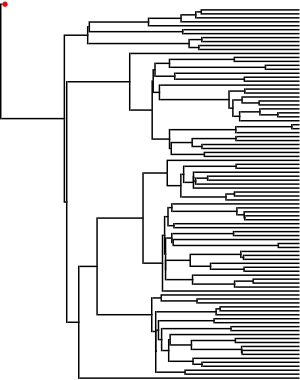

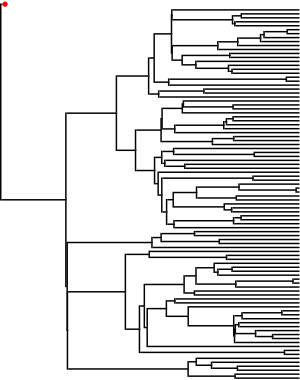

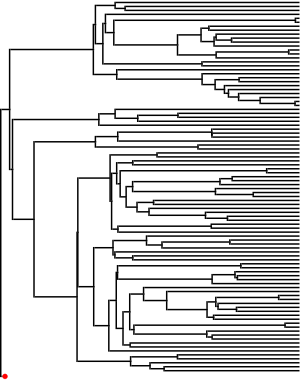

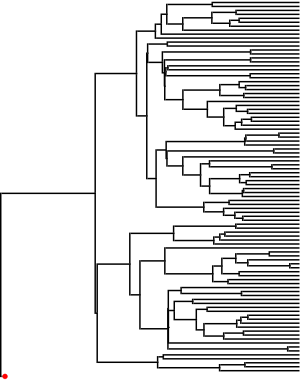

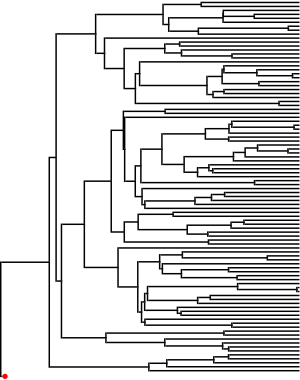

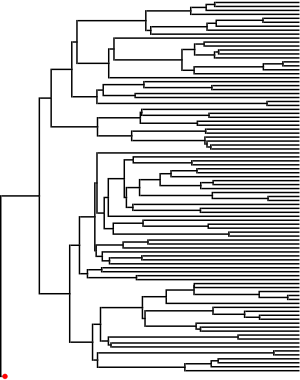

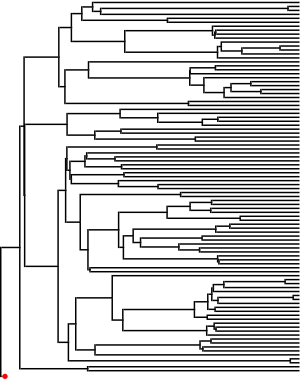

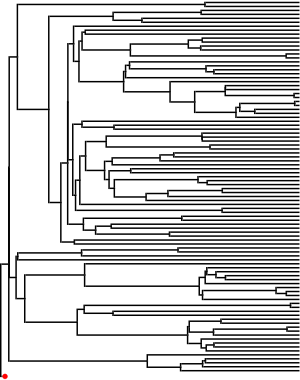

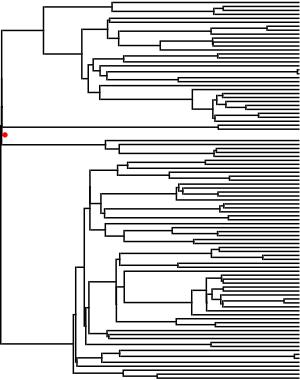

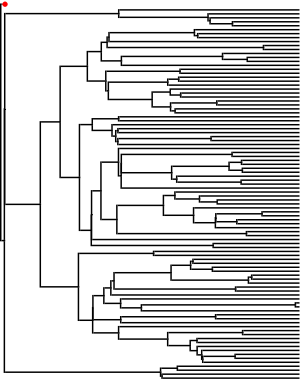

,delta_bind_CGG,delta_expr,age,lineages,tree_idx,time
0,0.266652,-0.322946,0.000000,94.0,4000.0,20.000000
1,0.299442,-0.303371,1.052632,93.0,4000.0,18.947368
2,0.316904,-0.275045,2.105263,91.0,4000.0,17.894737
3,0.280702,-0.232563,3.157895,87.0,4000.0,16.842105
4,0.268264,-0.220828,4.210526,75.0,4000.0,15.789474
...,...,...,...,...,...,...
19995,0.000000,0.000000,15.789474,1.0,4999.0,4.210526
19996,0.000000,0.000000,16.842105,1.0,4999.0,3.157895
19997,0.000000,0.000000,17.894737,1.0,4999.0,2.105263
19998,0.000000,0.000000,18.947368,1.0,4999.0,1.052632


In [28]:
slices = []
for tree_idx, tree in enumerate(trees[tree_start_idx:], tree_start_idx):
    print(tree_idx, end="                      \r")
    ete_tree = dendropy2ete(tree)
    if tree_idx < tree_start_idx + 10:
        display(ete_tree.render("%%inline", w=300, tree_style=tree_style))
    for age in np.linspace(0, 20, 20):
        slice = phenotype_slice(ete_tree, age)
        slice_summary = slice.mean()
        slice_summary["age"] = age
        slice_summary["lineages"] = len(slice)
        slice_summary["tree_idx"] = tree_idx
        slices.append(slice_summary)
df = pd.concat(slices, axis=1).T
df["time"] = df.age.max() - df.age
df

Rank trees by norm wrt the mean

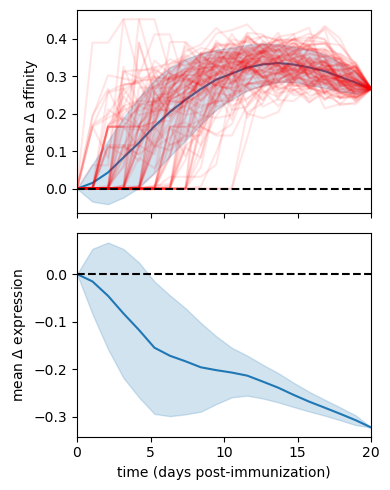

In [34]:
df.rename(columns={"delta_bind_CGG": r"mean $\Delta$ affinity", "delta_expr": r"mean $\Delta$ expression", "time": "time (days post-immunization)"}, inplace=True)

plt.figure(figsize=(4, 5))

plt.subplot(211)
ax = sns.lineplot(data=df, x="time (days post-immunization)", y=r"mean $\Delta$ affinity",
                  errorbar='sd')
sns.lineplot(data=df.query("tree_idx > 4900"), x="time (days post-immunization)", y=r"mean $\Delta$ affinity",
             estimator=None, units="tree_idx", alpha=0.1, color="r")
plt.axhline(0, color="black", linestyle="--")
plt.xlim(0, 20)
ax.set(xticklabels=[])
plt.xlabel(None)

plt.subplot(212)
sns.lineplot(data=df, x="time (days post-immunization)", y=r"mean $\Delta$ expression",
             errorbar='sd')
plt.axhline(0, color="black", linestyle="--")
plt.xlim(0, 20)

plt.tight_layout()
plt.savefig("output/affinity_expression.pdf")
plt.show()

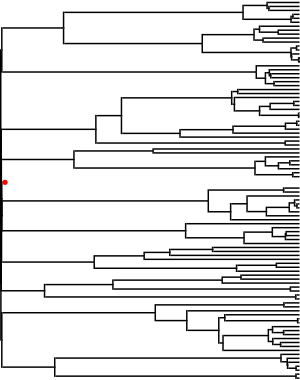

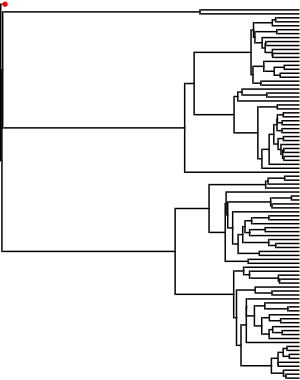

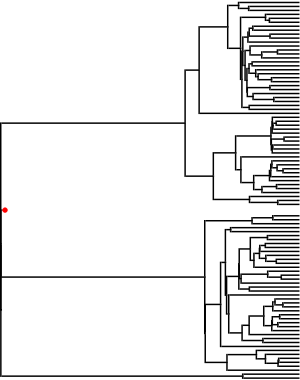

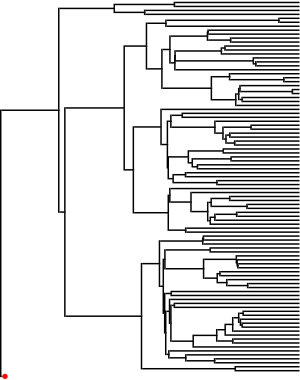

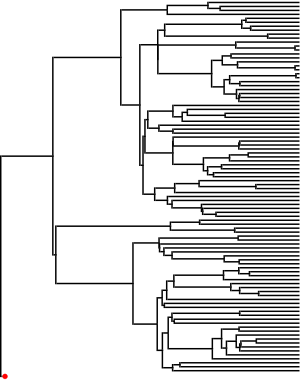

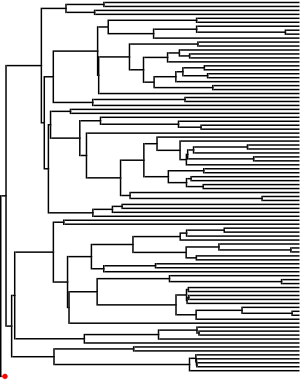

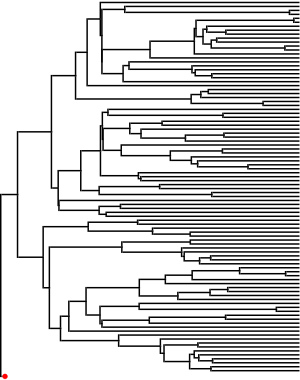

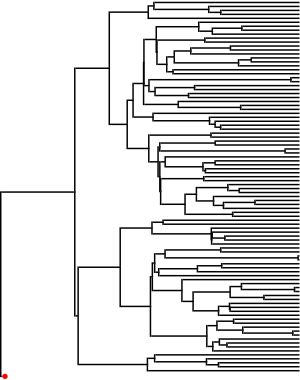

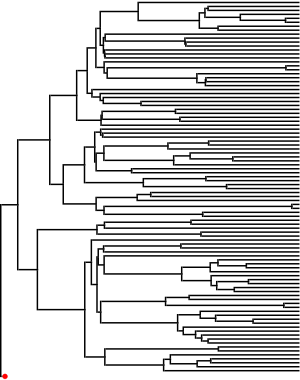

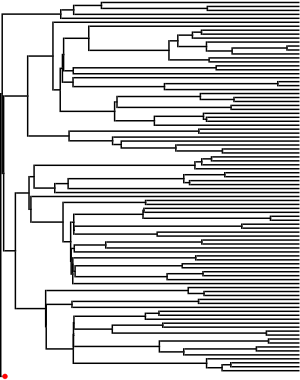

,tree_idx,age,delta_bind_CGG,delta_expr,time (days post-immunization)
0,0,20.071733,-0.71210,-0.92902,0.000
1,0,20.057438,-0.77804,-1.06571,0.000
2,0,20.055038,-0.75924,-1.10754,0.000
3,0,20.026988,-0.75924,-1.10754,0.000
4,0,20.013640,-3.64062,-1.18226,0.000
...,...,...,...,...,...
2371400,5000,0.000000,0.37509,-0.04042,20.072
2371401,5000,1.768943,0.37509,-0.04042,18.466
2371402,5000,0.000000,0.37509,-0.04042,20.072
2371403,5000,0.830542,0.37509,-0.04042,19.269


In [ ]:
dat = []
for tree_idx, tree in enumerate(trees):
    print(tree_idx, end="                      \r")
    ete_tree = dendropy2ete(tree)
    if tree_idx < 10:
        display(ete_tree.render("%%inline", w=300, tree_style=tree_style))
    for node in ete_tree.traverse():
        if node.mutations:
            for pos, age, ancestral, derived, mutation_phenotypes in node.mutations:
                dat.append([tree_idx, age, mutation_phenotypes.delta_bind_CGG, mutation_phenotypes.delta_expr])
        dat.append([tree_idx, node.age, node.phenotypes.delta_bind_CGG, node.phenotypes.delta_expr])
    # if tree_idx == 100:
    #     break
df = pd.DataFrame(dat, columns=["tree_idx", "age", "delta_bind_CGG", "delta_expr"])

bins = 100 #np.linspace(0, df.age.max(), 20)
df["time (days post-immunization)"] = pd.cut(df.age.max() - df.age, bins=bins).apply(lambda x: 0 if x.left < 0 else x.right)

df

In [ ]:
groups = df.groupby(["time (days post-immunization)", "tree_idx"])
summary_df = groups.agg({"delta_bind_CGG": "mean", "delta_expr": "mean"})
summary_df.rename(columns={"delta_bind_CGG": r"mean $\Delta$ affinity", "delta_expr": r"mean $\Delta$ expression"}, inplace=True)
summary_df.reset_index(inplace=True)
summary_df

,time (days post-immunization),tree_idx,mean $\Delta$ affinity,mean $\Delta$ expression
0,0.000,0,-1.129856,-0.596160
1,0.000,1,0.000000,0.000000
2,0.000,2,0.000000,0.000000
3,0.000,3,0.000000,0.000000
4,0.000,4,0.000000,0.000000
...,...,...,...,...
500095,20.072,4996,0.275292,-0.330713
500096,20.072,4997,0.277385,-0.321403
500097,20.072,4998,0.244360,-0.320077
500098,20.072,4999,0.233741,-0.317555


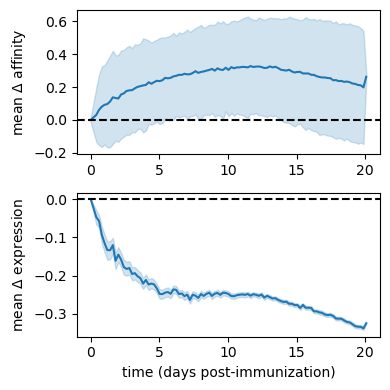

In [ ]:
plt.figure(figsize=(4, 4))

plt.subplot(211)
ax = sns.lineplot(data=summary_df, x="time (days post-immunization)", y=r"mean $\Delta$ affinity",
                  errorbar='sd')
plt.axhline(0, color="black", linestyle="--")
plt.xlabel(None)

plt.subplot(212, sharex=ax)
sns.lineplot(data=summary_df, x="time (days post-immunization)", y=r"mean $\Delta$ expression")
plt.axhline(0, color="black", linestyle="--")

plt.tight_layout()
plt.savefig("output/affinity_expression.pdf")
plt.show()

In [35]:
jared_df = pd.read_csv("~/Downloads/slice_df.csv")
jared_df["mouse"] = jared_df.gc.str.split("-").str[3]
# keep only 20-day mice, 1-6
jared_df = jared_df[jared_df.mouse.astype(int).isin(range(1, 7))]
# drop some trees as burn-in
jared_df = jared_df[jared_df.tree_idx > 4000]
jared_df


,delta_bind_CGG,delta_expr,age,lineages,tree_idx,time,gc,mouse
180020,0.764820,-0.380200,0.000000,4.0,4001.0,20.000000,PR-1-6-1-LB-19-GC,1
180021,0.606532,-0.113301,1.052632,86.0,4001.0,18.947368,PR-1-6-1-LB-19-GC,1
180022,0.615121,-0.113156,2.105263,85.0,4001.0,17.894737,PR-1-6-1-LB-19-GC,1
180023,0.604579,-0.104416,3.157895,79.0,4001.0,16.842105,PR-1-6-1-LB-19-GC,1
180024,0.600054,-0.101052,4.210526,73.0,4001.0,15.789474,PR-1-6-1-LB-19-GC,1
...,...,...,...,...,...,...,...,...
399995,0.035272,-0.241746,15.789474,5.0,4999.0,4.210526,PR-1-6-3-LA-66-GC,3
399996,0.036937,-0.294127,16.842105,4.0,4999.0,3.157895,PR-1-6-3-LA-66-GC,3
399997,0.035430,-0.291535,17.894737,4.0,4999.0,2.105263,PR-1-6-3-LA-66-GC,3
399998,0.005645,-0.005463,18.947368,4.0,4999.0,1.052632,PR-1-6-3-LA-66-GC,3


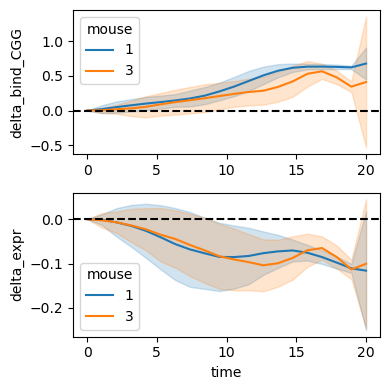

In [38]:
plt.figure(figsize=(4, 4))

plt.subplot(211)
ax = sns.lineplot(data=jared_df, x="time", y="delta_bind_CGG", hue="mouse", errorbar='sd')
plt.axhline(0, color="black", linestyle="--")
plt.xlabel(None)

plt.subplot(212, sharex=ax)
sns.lineplot(data=jared_df, x="time", y="delta_expr", hue="mouse", errorbar='sd')
plt.axhline(0, color="black", linestyle="--")

plt.tight_layout()
plt.show()

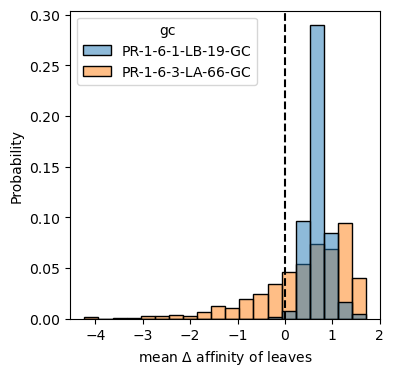

In [45]:
leaves = jared_df.query("age == 0")

plt.figure(figsize=(4, 4))
sns.histplot(data=leaves, x="delta_bind_CGG", hue="gc", stat="probability", bins=20)
plt.axvline(0, color="black", linestyle="--")
plt.xlabel(r"mean $\Delta$ affinity of leaves")
plt.show()

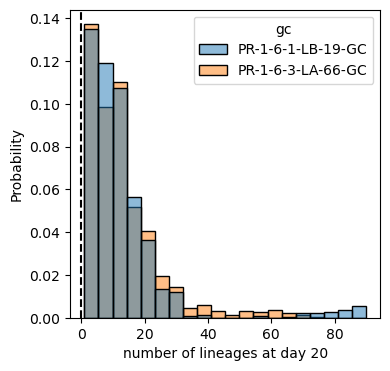

In [48]:
plt.figure(figsize=(4, 4))
sns.histplot(data=leaves, x="lineages", hue="gc", stat="probability", bins=20)
plt.axvline(0, color="black", linestyle="--")
plt.xlabel(r"number of lineages at day 20")
plt.show()

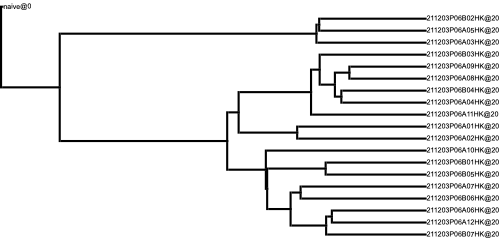

In [64]:
import pickle

tree94 = pickle.load(open("/Users/wsdewitt/Downloads/94.pkl", "rb"))

tree_style = ete3.TreeStyle()
tree_style.branch_vertical_margin = 5
tree_style.show_scale = False
tree_style.scale = 30

for node in tree94.traverse():
    style = ete3.NodeStyle()
    style["hz_line_width"] = 3
    style["vt_line_width"] = 3
    if node.is_leaf():
        # ete_node.name = dendropy_node.taxon.label
        if node.name == "naive":
            style["fgcolor"] = "red"
            style["size"] = 10
        else:
            style["fgcolor"] = "black"
            style["size"] = 0
    else:
        style["size"] = 0

    node.set_style(style)

tree94.render("%%inline", w=500, tree_style=tree_style)


In [65]:
for leaf in tree94:
    print(leaf.name, leaf.age, leaf.get_distance(tree94))

naive@0 20.000000000000004 0.06310295679916678
211203P06B02HK@20 3.552713678800501e-15 20.063102956799167
211203P06A05HK@20 3.552713678800501e-15 20.063102956799167
211203P06A03HK@20 3.552713678800501e-15 20.063102956799167
211203P06B03HK@20 3.552713678800501e-15 20.063102956799167
211203P06A09HK@20 3.552713678800501e-15 20.063102956799167
211203P06A08HK@20 3.552713678800501e-15 20.063102956799167
211203P06B04HK@20 7.105427357601002e-15 20.063102956799167
211203P06A04HK@20 7.105427357601002e-15 20.063102956799167
211203P06A11HK@20 3.552713678800501e-15 20.063102956799167
211203P06A01HK@20 3.552713678800501e-15 20.063102956799167
211203P06A02HK@20 3.552713678800501e-15 20.063102956799167
211203P06A10HK@20 3.552713678800501e-15 20.063102956799167
211203P06B01HK@20 7.105427357601002e-15 20.063102956799167
211203P06B05HK@20 7.105427357601002e-15 20.063102956799167
211203P06A07HK@20 3.552713678800501e-15 20.063102956799167
211203P06B06HK@20 3.552713678800501e-15 20.063102956799167
211203P06

In [54]:
!ls ~/Downloads/4999.pkl

/Users/wsdewitt/Downloads/4999.pkl


In [66]:
tree94.age

20.06310295679917